In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Read dataset
dataset = pd.read_csv('dataset1.csv')
#read csv file
#Dataset contains following features:
#age — age in years
#sex — (1 = male; 0 = female)
#cp — chest pain type
#trestbps — resting blood pressure (in mm Hg on admission to the hospital)
#chol — serum cholestoral in mg/dl
#fbs — (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#restecg — resting electrocardiographic results
#thalach — maximum heart rate achieved
#exang — exercise induced angina (1 = yes; 0 = no)
#oldpeak — ST depression induced by exercise relative to rest
#slope — the slope of the peak exercise ST segment
#ca — number of major vessels (0–3) colored by flourosopy
#thal — 3 = normal; 6 = fixed defect; 7 = reversable defect
#target — have disease or not (1=yes, 0=no)

In [3]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
print("No of patients in original data:" +str(len(dataset.index)))

No of patients in original data:303


# Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C83D8F3C88>,
      dtype=object)

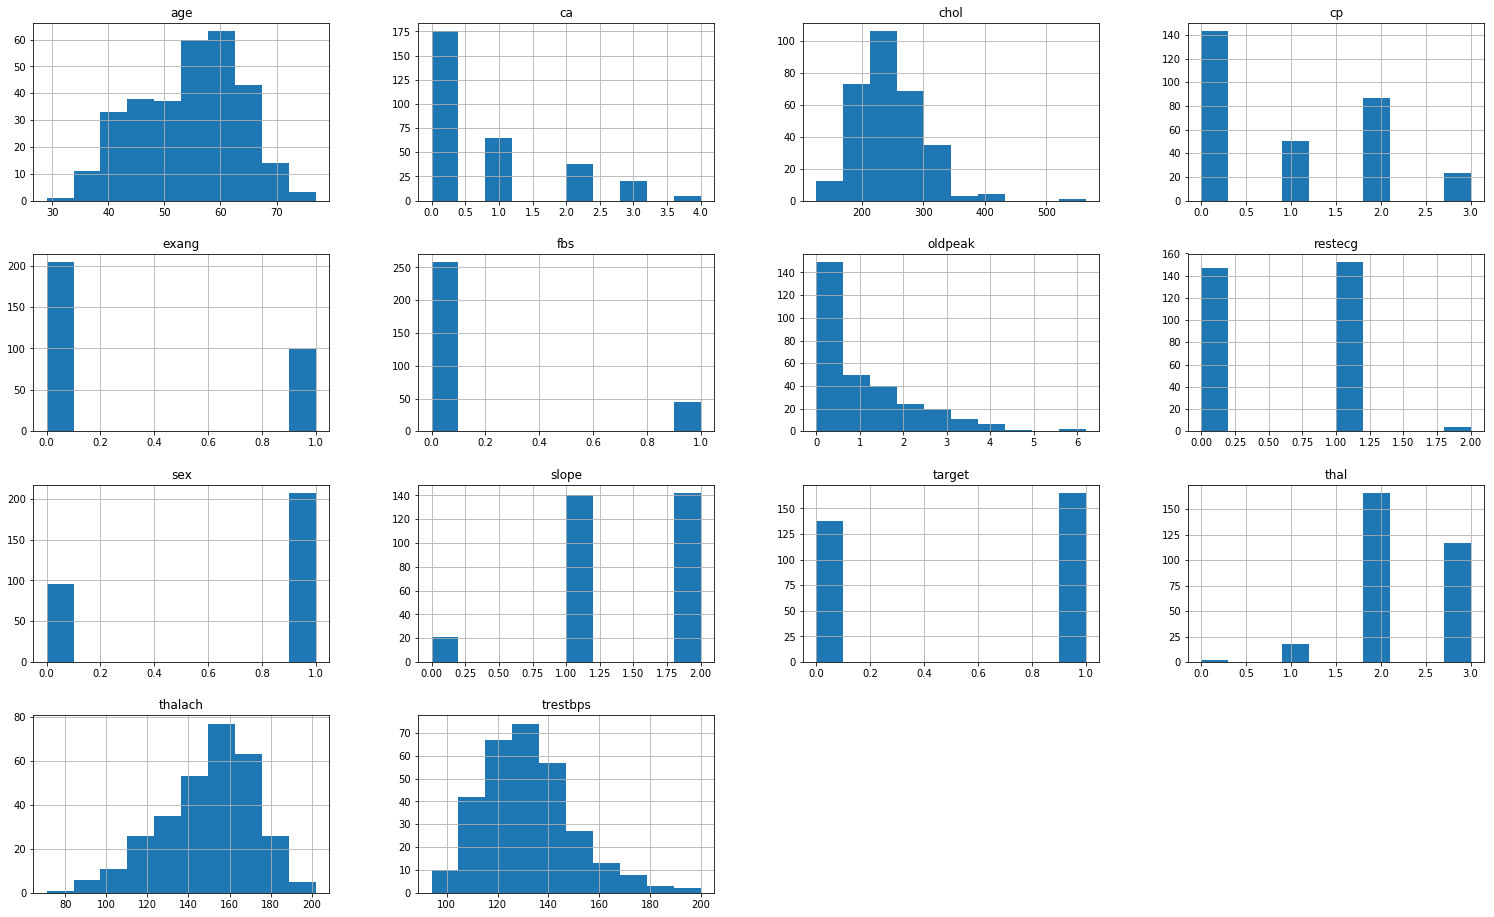

In [7]:
dataset.hist(figsize=(26,16))

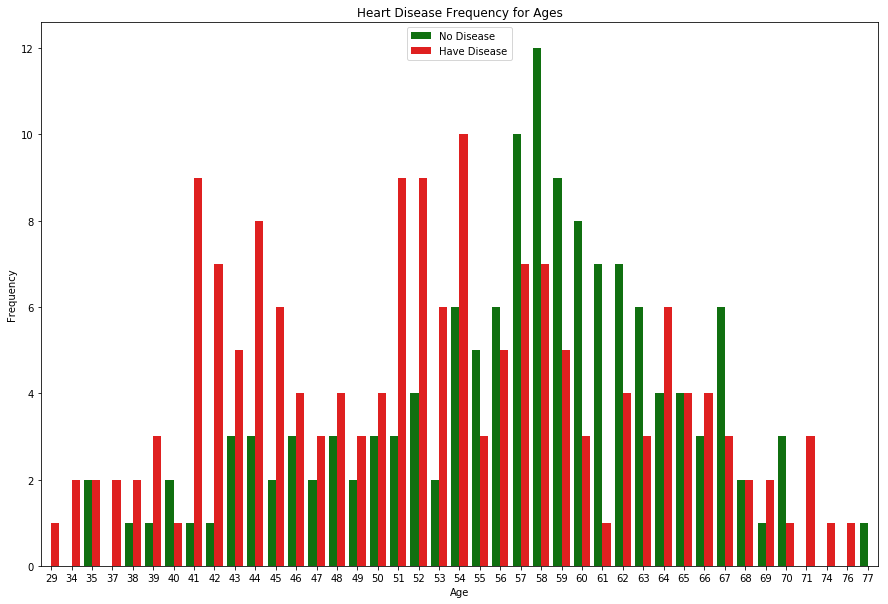

In [8]:
# Heart disease frequency by age
plt.figure(figsize=(15, 10))
sns.countplot(x='age', hue='target', data=dataset, palette=['green', 'red'])
plt.legend(["No Disease", "Have Disease"])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

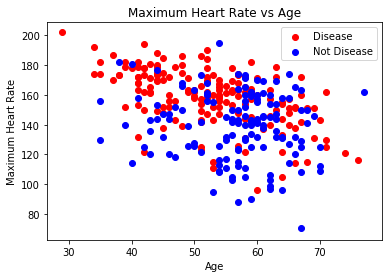

In [9]:
# Maximum heart rate vs age
plt.scatter(x=dataset.age[dataset.target==1], y=dataset.thalach[(dataset.target==1)], c="red")
plt.scatter(x=dataset.age[dataset.target==0], y=dataset.thalach[(dataset.target==0)], c = 'blue')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.title("Maximum Heart Rate vs Age")
plt.show()

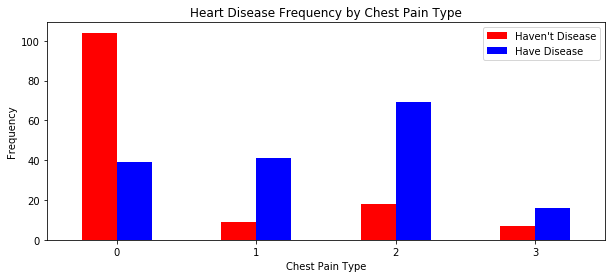

In [10]:
# Frequency of Chest pain type
pd.crosstab(dataset.cp,dataset.target).plot(kind="bar",figsize=(10,4),color=['red','blue' ])
plt.title('Heart Disease Frequency by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [11]:
corr = dataset.corr()
print(corr)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

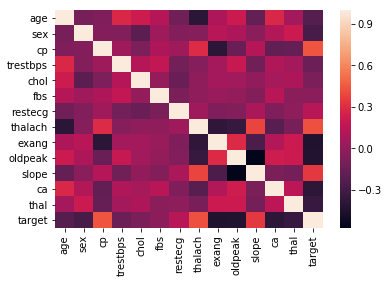

In [12]:
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)

In [13]:
# Find independent variables
X = dataset.iloc[:,:-1].values

In [14]:
print(X)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]


In [15]:
# Find dependent variables
y = dataset.iloc[:,13].values

In [16]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [18]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X1_train = sc_X.fit_transform(X_train)
X1_test = sc_X.transform(X_test)

In [19]:
print(X1_train)

[[-1.35679832  0.72250438  0.00809909 ...  0.95390513 -0.68970073
  -0.50904773]
 [ 0.38508599  0.72250438 -0.97189094 ...  0.95390513 -0.68970073
   1.17848036]
 [-0.92132724  0.72250438  0.98808912 ... -0.69498803 -0.68970073
  -0.50904773]
 ...
 [ 1.58263146  0.72250438  1.96807914 ... -0.69498803  0.32186034
  -0.50904773]
 [-0.92132724  0.72250438 -0.97189094 ...  0.95390513 -0.68970073
   1.17848036]
 [ 0.92942484 -1.38407465  0.00809909 ...  0.95390513  1.33342142
  -0.50904773]]


# K Nearest Neighbour

Text(0,0.5,'Error Rate')

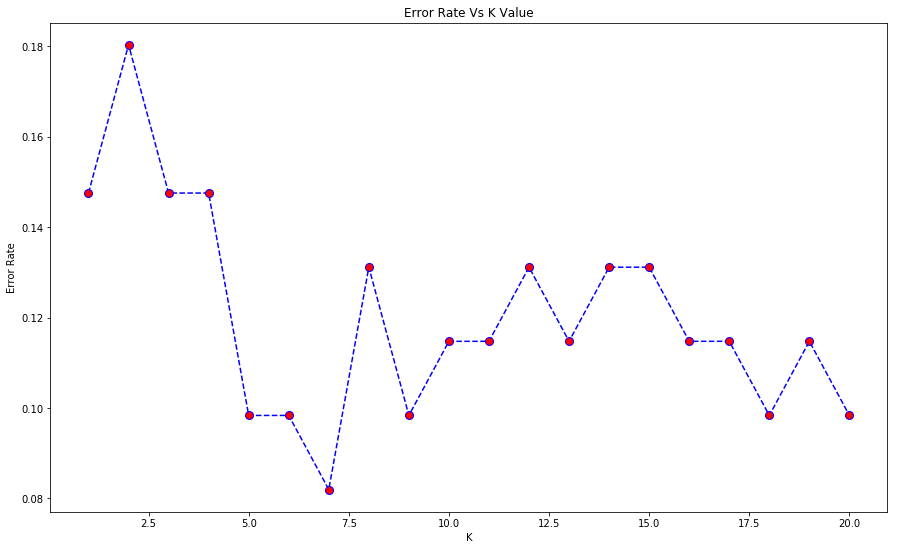

In [20]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski', p=2, weights ='uniform')
    # n_neighbors - Number of neighbors to use, weights - ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
    # metric - the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. 
    knn_classifier.fit(X1_train, y_train)
    knn_y_pred=knn_classifier.predict(X1_test)
    error_rate.append(np.mean(knn_y_pred !=y_test))
#predicting error for every k value   
plt.figure(figsize=(15,9))
plt.plot(range(1,21),error_rate,color='blue',linestyle='dashed',marker=
'o',markerfacecolor='red',markersize=8)
plt.title('Error Rate Vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [21]:
min_error = min(error_rate)
print(min_error)
optimal_k = error_rate.index(min(error_rate))+1
print(optimal_k)

0.08196721311475409
7


In [22]:
knn_classifier =KNeighborsClassifier(n_neighbors=optimal_k,metric = 'minkowski', p=2, weights ='uniform')
knn_classifier.fit(X1_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [23]:
knn_y_pred =knn_classifier.predict(X1_test)

In [24]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,knn_y_pred)
print(cm)

# True Positive (TP) : Observation is positive, and is predicted to be positive. (top left)
# False Negative (FN) : Observation is positive, but is predicted negative. (botttom left)
# True Negative (TN) : Observation is negative, and is predicted to be negative.(bottom right)
# False Positive (FP) : Observation is negative, but is predicted positive. (top right)

[[27  2]
 [ 3 29]]


In [25]:
print('Accuracy of k nearest neighbors classifier on test set: {:.2f}'.format(knn_classifier.score(X1_test, y_test)))

Accuracy of k nearest neighbors classifier on test set: 0.92


In [26]:
dataset_X_test= pd.DataFrame(X_test,columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])
dataset_X_test.insert(13, "original target",y_test)
dataset_X_test.insert(14, "knn_predicted_target",knn_y_pred)
dataset_X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,original target,knn_predicted_target
0,57.0,1.0,0.0,150.0,276.0,0.0,0.0,112.0,1.0,0.6,1.0,1.0,1.0,0,0
1,59.0,1.0,3.0,170.0,288.0,0.0,0.0,159.0,0.0,0.2,1.0,0.0,3.0,0,0
2,57.0,1.0,2.0,150.0,126.0,1.0,1.0,173.0,0.0,0.2,2.0,1.0,3.0,1,1
3,56.0,0.0,0.0,134.0,409.0,0.0,0.0,150.0,1.0,1.9,1.0,2.0,3.0,0,0
4,71.0,0.0,2.0,110.0,265.0,1.0,0.0,130.0,0.0,0.0,2.0,1.0,2.0,1,1
5,57.0,1.0,2.0,150.0,168.0,0.0,1.0,174.0,0.0,1.6,2.0,0.0,2.0,1,1
6,46.0,0.0,0.0,138.0,243.0,0.0,0.0,152.0,1.0,0.0,1.0,0.0,2.0,1,1
7,56.0,0.0,0.0,200.0,288.0,1.0,0.0,133.0,1.0,4.0,0.0,2.0,3.0,0,0
8,54.0,1.0,0.0,122.0,286.0,0.0,0.0,116.0,1.0,3.2,1.0,2.0,2.0,0,0
9,54.0,1.0,2.0,125.0,273.0,0.0,0.0,152.0,0.0,0.5,0.0,1.0,2.0,1,1


# SVM

In [27]:
from sklearn.svm import SVC
svm_accuracy = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svm_classifier = SVC(kernel = kernels[i], random_state = 42, gamma = 'auto')
    # kernel - Specifies the kernel type to be used in the algorithm. 
    svm_classifier.fit(X1_train,y_train)
    svm_y_pred = svm_classifier.predict(X1_test)
    svm_accuracy.append(svm_classifier.score(X1_test, y_test))

Text(0.5,1,'Support Vector Classifier scores for different kernels')

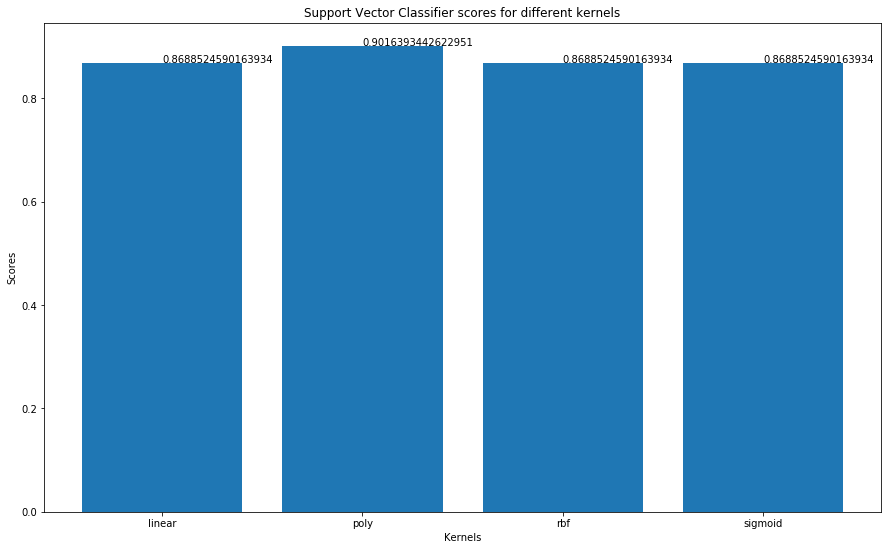

In [28]:
plt.figure(figsize=(15,9))
plt.bar(kernels, svm_accuracy, align = 'center')
for i in range(len(kernels)):
    plt.text(i, svm_accuracy[i],svm_accuracy[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [29]:
max_accuracy = max(svm_accuracy)
print(max_accuracy)
optimal_kernel = kernels[svm_accuracy.index(max(svm_accuracy))]
print(optimal_kernel)

0.9016393442622951
poly


In [30]:
#Fittiing the classifier to the Training Set
svm_classifier = SVC(kernel = optimal_kernel, random_state = 42,gamma='auto')
svm_classifier.fit(X1_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [31]:
#Predicitng the Test Set results
svm_y_pred = svm_classifier.predict(X1_test)

In [32]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,svm_y_pred)
print(cm)

[[26  3]
 [ 3 29]]


In [33]:
print('Accuracy of svm classifier on test set: {:.2f}'.format(svm_classifier.score(X1_test, y_test)))

Accuracy of svm classifier on test set: 0.90


In [34]:
dataset_X_test.insert(15, "svm_predicted_target",svm_y_pred)
dataset_X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,original target,knn_predicted_target,svm_predicted_target
0,57.0,1.0,0.0,150.0,276.0,0.0,0.0,112.0,1.0,0.6,1.0,1.0,1.0,0,0,0
1,59.0,1.0,3.0,170.0,288.0,0.0,0.0,159.0,0.0,0.2,1.0,0.0,3.0,0,0,1
2,57.0,1.0,2.0,150.0,126.0,1.0,1.0,173.0,0.0,0.2,2.0,1.0,3.0,1,1,1
3,56.0,0.0,0.0,134.0,409.0,0.0,0.0,150.0,1.0,1.9,1.0,2.0,3.0,0,0,0
4,71.0,0.0,2.0,110.0,265.0,1.0,0.0,130.0,0.0,0.0,2.0,1.0,2.0,1,1,1
5,57.0,1.0,2.0,150.0,168.0,0.0,1.0,174.0,0.0,1.6,2.0,0.0,2.0,1,1,1
6,46.0,0.0,0.0,138.0,243.0,0.0,0.0,152.0,1.0,0.0,1.0,0.0,2.0,1,1,1
7,56.0,0.0,0.0,200.0,288.0,1.0,0.0,133.0,1.0,4.0,0.0,2.0,3.0,0,0,0
8,54.0,1.0,0.0,122.0,286.0,0.0,0.0,116.0,1.0,3.2,1.0,2.0,2.0,0,0,0
9,54.0,1.0,2.0,125.0,273.0,0.0,0.0,152.0,0.0,0.5,0.0,1.0,2.0,1,1,1


## Testing Realtime Data

In [ ]:
patient_age = int(input("Enter Patient Age (in years):  "))
patient_sex = int(input("Enter Patient Gender(1 = male; 0 = female):  "))
patient_cp = int(input("Enter Patient Chest Pain Type (0 = typical angina, 1 = atypical angina, 2 = non — anginal pain, 3 = asymptotic):  "))
patient_trestbps = int(input("Enter Patient Blood Pressure (in mmHg )(normal:- 80/140):  "))
patient_chol = int(input("Enter Patient Cholestrol (in mg/dl ) (normal:- around 200):  "))
patient_fbs = int(input("Enter Patient Fasting blood sugar (fasting blood sugar > 120 mg/dl 1 = true; 0 = false ):  "))
patient_restecg = int(input("Enter Patient resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = left ventricular hyperthrophy):  "))
patient_thalach = int(input("Enter Patient max heart rate achieved: (Normal: 80-110):  "))
patient_exang = int(input("Enter Patient Exercise induced angina(1 = yes, 0 = no):  "))
patient_oldpeak = float(input("Enter ST depression induced by exercise relative to rest ( 0 - 4):  "))
patient_slope = int(input("Enter Peak exercise ST segment  (0 = upsloping, 1 = flat,2 = downsloping):  "))
patient_ca = int(input("Enter Number of major vessels (0–3) colored by flourosopy:  "))
patient_thal = int(input("Enter patient thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect):  "))

patient_data = {'age':  [patient_age],
                 'sex':  [patient_sex],
                 'cp':  [patient_cp],
                 'trestbps':  [patient_trestbps],
                 'chol':  [patient_chol],
                 'fbs':  [patient_fbs],
                 'restecg':  [patient_restecg],
                 'thalach':  [patient_thalach],
                 'exang':  [patient_exang],
                 'oldpeak':  [patient_oldpeak],
                 'slope':  [patient_slope],
                 'ca':  [patient_ca],
                 'thal':  [patient_thal],}

patient_dataset = pd.DataFrame (patient_data, columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])

patient_X = patient_dataset.iloc[:,:].values
patient_data1 = sc_X.transform(patient_X)
knn_patient_target = knn_classifier.predict(patient_data1) 
svm_patient_target = svm_classifier.predict(patient_data1)

patient_dataset.insert(13, "knn_predicted_target",knn_patient_target)
patient_dataset.insert(14, "svm_predicted_target",svm_patient_target)

if knn_patient_target == 1 and svm_patient_target == 1 :
    result = "Patient have heart disease"
elif knn_patient_target == 0 and svm_patient_target == 0 :
    result = "Patient have no heart disease"
else :
    result = "Patient have a possibility of heart disease"

patient_dataset.insert(15, "result", result)
patient_dataset